Importing relevent libraries

In [103]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!pip install geopy
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import seaborn as sns #For plotting the graphs

print('Libraries imported.')

Libraries imported.


Importing the dataset of waterfalls and getting a display of it.

In [104]:
df1=pd.read_csv('waterfall2.csv')
df1.head()

,Name,Distance,Latitude,Logitude
0,Bambarakanda Ella Falls,165,6.773591,80.831241
1,Kalugala Gerandi Ella Waterfall Cluster,181,7.042377,80.682780
2,Kurundu Oya Ella Falls (Maturata Ella Falls),182,7.080446,80.850209
3,Diyaluma Ella Falls,189,6.733192,81.031401
4,Mapalana Ella Falls,111,6.774521,80.461450


Getting the max distance from Colombo and adding a new column to the table based on the distance.

In [105]:
df1['Distance'].max()

336

In [106]:
Travellable=pd.cut(df1['Distance'], bins=[0, 100, 150,200,250,350], include_lowest=True, labels=[ 'Very Close', 'Close','Average','Far','Very Far'])
df1.insert (2, "Travellable", Travellable)
df1.head()

,Name,Distance,Travellable,Latitude,Logitude
0,Bambarakanda Ella Falls,165,Average,6.773591,80.831241
1,Kalugala Gerandi Ella Waterfall Cluster,181,Average,7.042377,80.682780
2,Kurundu Oya Ella Falls (Maturata Ella Falls),182,Average,7.080446,80.850209
3,Diyaluma Ella Falls,189,Average,6.733192,81.031401
4,Mapalana Ella Falls,111,Close,6.774521,80.461450


Getting Location values of Sri Lanka 

In [107]:
address = 'Sri Lanka'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sri Lanka are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sri Lanka are 7.5554942, 80.7137847.


Mapping the Waterfall Locations in the map

In [108]:
map_waterfall = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, distance in zip(df1['Latitude'], df1['Logitude'], df1['Name'], df1['Distance']):
    label = '{}, {}'.format(name, distance)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_waterfall)  
    
map_waterfall

Defining Foursquare Credentials

In [109]:
CLIENT_ID = 'YWOK0TLK1YWOFQQPP3R3E40LASNMZOSSV0C3CQQU0ZALCYGS' # your Foursquare ID
CLIENT_SECRET = 'VDPDLUEMHYMXCUMB4EDFC5S3W5FGATC4EHXJ0R4OCV1HPQLR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YWOK0TLK1YWOFQQPP3R3E40LASNMZOSSV0C3CQQU0ZALCYGS
CLIENT_SECRET:VDPDLUEMHYMXCUMB4EDFC5S3W5FGATC4EHXJ0R4OCV1HPQLR


Creating a function to get the venue category types from Foursquare for all the waterfall locations

In [110]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT=100   
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Name Latitude', 
                  'Name Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Running the function for all locations

In [111]:
waterfall_venues = getNearbyVenues(names=df1['Name'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Logitude']
                                  )



Bambarakanda Ella Falls
Kalugala Gerandi Ella Waterfall Cluster
Kurundu Oya Ella Falls (Maturata Ella Falls)
Diyaluma Ella Falls
Mapalana Ella Falls
Lakshapana Ella Falls
Olu Ella Falls
Dun Ella Falls
Mahakandura Ella Falls
Kirindi Ella Falls
Ramboda Ella Falls (Puna Ella)
Uran Watuna Ella Falls
Demali Ella Falls
Ratna Ella Falls
Dunsinane Falls
Elihatha Ella Falls
Galdola Ella Falls
Gerandi Gini Ella Falls
Nakkavita Ella Falls
Puna Falls
Ravana Falls
Aberdeen Falls
Devon Falls
Devagiri Ella Falls (Diyangiri Ella Falls)
Pulun Ella Falls
Dotalu Ella Falls
Pitawala Pathana Ella Fall No 2
St. Clair's Falls
Huluganga Ella Falls
Mala Ella Falls
Pitawala Pathana Ella Fall No 1
Dehena Ella Falls (Gaslabu Ella)
Narangas Ella Falls - Kanneliya
Alupola Ella Falls
Madanagiri Ella Falls
Dunhinda Ella Falls
Bomburu Ella Falls
Alakola Ella Falls
Doovili Falls
Diyawini Ella Falls
Bopath Ella Falls
Bakers Falls
Sera Ella Falls


Checking the size of the dataFrame

In [112]:
print(waterfall_venues.shape)

(221, 7)


Getting the venue details for each location

In [113]:
waterfall_venues.groupby('Name').count()

,Name Latitude,Name Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Name,,,,,,
Aberdeen Falls,6,6,6,6,6,6
Alakola Ella Falls,4,4,4,4,4,4
Bakers Falls,4,4,4,4,4,4
Bambarakanda Ella Falls,4,4,4,4,4,4
Bomburu Ella Falls,9,9,9,9,9,9
Bopath Ella Falls,6,6,6,6,6,6
Dehena Ella Falls (Gaslabu Ella),3,3,3,3,3,3
Demali Ella Falls,5,5,5,5,5,5
Devon Falls,9,9,9,9,9,9


Checking how many unique venue categories in the dataframe

In [114]:
print('There are {} uniques categories.'.format(len(waterfall_venues['Venue Category'].unique())))

There are 48 uniques categories.


Analyzing each neighborhood

In [115]:
# one hot encoding
waterfall_onehot = pd.get_dummies(waterfall_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
waterfall_onehot['Name'] = waterfall_venues['Name'] 

# move neighborhood column to the first column
fixed_columns = [waterfall_onehot.columns[-1]] + list(waterfall_onehot.columns[:-1])
waterfall_onehot = waterfall_onehot[fixed_columns]

waterfall_onehot.head()

,Name,American Restaurant,Asian Restaurant,Bakery,Bar,Bed & Breakfast,Botanical Garden,Bridge,Buffet,Bus Station,Cafeteria,Café,Campground,Convenience Store,Diner,Farm,Fast Food Restaurant,Food,Grocery Store,Historic Site,Hotel,Hotel Bar,Intersection,Lake,Metro Station,Motel,Mountain,Museum,National Park,Other Great Outdoors,RV Park,Resort,Restaurant,River,Rock Climbing Spot,Scenic Lookout,Shopping Mall,Shopping Plaza,Snack Place,Spa,Sri Lankan Restaurant,Supermarket,Tea Room,Trail,Train Station,Tunnel,Vacation Rental,Vegetarian / Vegan Restaurant,Waterfall
0,Bambarakanda Ella Falls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bambarakanda Ella Falls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bambarakanda Ella Falls,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bambarakanda Ella Falls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kalugala Gerandi Ella Waterfall Cluster,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [116]:
waterfall_grouped = waterfall_onehot.groupby('Name').mean().reset_index()
waterfall_grouped

,Name,American Restaurant,Asian Restaurant,Bakery,Bar,Bed & Breakfast,Botanical Garden,Bridge,Buffet,Bus Station,Cafeteria,Café,Campground,Convenience Store,Diner,Farm,Fast Food Restaurant,Food,Grocery Store,Historic Site,Hotel,Hotel Bar,Intersection,Lake,Metro Station,Motel,Mountain,Museum,National Park,Other Great Outdoors,RV Park,Resort,Restaurant,River,Rock Climbing Spot,Scenic Lookout,Shopping Mall,Shopping Plaza,Snack Place,Spa,Sri Lankan Restaurant,Supermarket,Tea Room,Trail,Train Station,Tunnel,Vacation Rental,Vegetarian / Vegan Restaurant,Waterfall
0,Aberdeen Falls,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.166667,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.166667,0.00000,0.000000,0.000000,0.333333,0.00,0.00,0.00,0.000000
1,Alakola Ella Falls,0.000000,0.000000,0.250000,0.00000,0.000000,0.000000,0.00000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.250000,0.00000,0.250000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000
2,Bakers Falls,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.25000,0.250000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.500000,0.00,0.00,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000
3,Bambarakanda Ella Falls,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.250000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.500000,0.00,0.00,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000
4,Bomburu Ella Falls,0.000000,0.000000,0.000000,0.00000,0.000000,0.111111,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.333333,0.111111,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.222222,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.00000,0.000000,0.111111,0.000000,0.00,0.00,0.00,0.000000
5,Bopath Ella Falls,0.000000,0.166667,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.166667,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000
6,Dehena Ella Falls (Gaslabu Ella),0.000000,0.000000,0.333333,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000
7,Demali Ella Falls,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.2,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.200000,0.000000,0.0,0.000000,0.00000,0.200000,0.200000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000
8,Devon Falls,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

creating a new dataframe and display the top 10 venues for each neighborhood.

In [117]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
waterfall_venues_sorted = pd.DataFrame(columns=columns)
waterfall_venues_sorted['Name'] = waterfall_grouped['Name']

for ind in np.arange(waterfall_grouped.shape[0]):
   waterfall_venues_sorted.iloc[ind, 1:] = return_most_common_venues(waterfall_grouped.iloc[ind, :], num_top_venues)

waterfall_venues_sorted.head()

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aberdeen Falls,Train Station,Sri Lankan Restaurant,Bus Station,Convenience Store,River,Waterfall,Campground,Hotel,Historic Site,Grocery Store
1,Alakola Ella Falls,Bakery,Other Great Outdoors,Bus Station,Resort,Waterfall,Diner,Hotel Bar,Hotel,Historic Site,Grocery Store
2,Bakers Falls,Scenic Lookout,Motel,Mountain,Waterfall,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
3,Bambarakanda Ella Falls,Scenic Lookout,Mountain,Bus Station,Waterfall,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant
4,Bomburu Ella Falls,Hotel,Restaurant,Hotel Bar,Trail,Botanical Garden,Fast Food Restaurant,Waterfall,Convenience Store,Historic Site,Grocery Store


Running  k-means to cluster the neighborhood into 3 clusters.

In [118]:
kclusters =3

waterfall_grouped_clustering = waterfall_grouped.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(waterfall_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [119]:
# add clustering labels
waterfall_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Merging df1 and waterfall_venues_sorted dataframes into waterfall_merged dataframe

In [120]:
waterfall_merged = pd.merge(df1, waterfall_venues_sorted, on='Name')
waterfall_merged.head() # check the last columns!

,Name,Distance,Travellable,Latitude,Logitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bambarakanda Ella Falls,165,Average,6.773591,80.831241,1,Scenic Lookout,Mountain,Bus Station,Waterfall,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant
1,Kalugala Gerandi Ella Waterfall Cluster,181,Average,7.042377,80.682780,0,Tea Room,American Restaurant,Bus Station,Hotel,Museum,Food,Farm,Resort,Scenic Lookout,Bed & Breakfast
2,Kurundu Oya Ella Falls (Maturata Ella Falls),182,Average,7.080446,80.850209,1,Scenic Lookout,Mountain,Snack Place,Waterfall,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
3,Diyaluma Ella Falls,189,Average,6.733192,81.031401,0,Hotel,Campground,Scenic Lookout,Other Great Outdoors,Rock Climbing Spot,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
4,Mapalana Ella Falls,111,Close,6.774521,80.461450,1,Mountain,Waterfall,Lake,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm


Adding Names for the clusters

In [121]:
clusterName=pd.cut(waterfall_merged['Cluster Labels'], bins=[0, 0.5, 1.5, 2.5], include_lowest=True, labels=[ 'Comfort Zone Lover', 'Nature Lover','Visit and Come'])
waterfall_merged.insert (6, "Cluster Name", clusterName)
waterfall_merged.head()

,Name,Distance,Travellable,Latitude,Logitude,Cluster Labels,Cluster Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bambarakanda Ella Falls,165,Average,6.773591,80.831241,1,Nature Lover,Scenic Lookout,Mountain,Bus Station,Waterfall,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant
1,Kalugala Gerandi Ella Waterfall Cluster,181,Average,7.042377,80.682780,0,Comfort Zone Lover,Tea Room,American Restaurant,Bus Station,Hotel,Museum,Food,Farm,Resort,Scenic Lookout,Bed & Breakfast
2,Kurundu Oya Ella Falls (Maturata Ella Falls),182,Average,7.080446,80.850209,1,Nature Lover,Scenic Lookout,Mountain,Snack Place,Waterfall,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
3,Diyaluma Ella Falls,189,Average,6.733192,81.031401,0,Comfort Zone Lover,Hotel,Campground,Scenic Lookout,Other Great Outdoors,Rock Climbing Spot,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
4,Mapalana Ella Falls,111,Close,6.774521,80.461450,1,Nature Lover,Mountain,Waterfall,Lake,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm


Visualizing the map with label informations

In [122]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, trl, clusterName,v1,v2,v3 in zip(waterfall_merged['Latitude'], waterfall_merged['Logitude'], waterfall_merged['Name'], waterfall_merged['Cluster Labels'],waterfall_merged['Travellable'],waterfall_merged['Cluster Name'],waterfall_merged['1st Most Common Venue'],waterfall_merged['2nd Most Common Venue'],waterfall_merged['3rd Most Common Venue']):
    label = folium.Popup(str(poi) + ' / ' + str(clusterName) +' / '+ str(trl)+' / '+ str(v1)+','+str(v2)+','+str(v3), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examinig Cluster 1 Details

In [123]:
waterfall_merged.loc[waterfall_merged['Cluster Labels'] == 0, waterfall_merged.columns[[1] + list(range(5, waterfall_merged.shape[1]))]]

,Distance,Cluster Labels,Cluster Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,181,0,Comfort Zone Lover,Tea Room,American Restaurant,Bus Station,Hotel,Museum,Food,Farm,Resort,Scenic Lookout,Bed & Breakfast
3,189,0,Comfort Zone Lover,Hotel,Campground,Scenic Lookout,Other Great Outdoors,Rock Climbing Spot,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
5,112,0,Comfort Zone Lover,Waterfall,Mountain,Vegetarian / Vegan Restaurant,Vacation Rental,Asian Restaurant,Bakery,Hotel Bar,Hotel,Historic Site,Grocery Store
8,160,0,Comfort Zone Lover,Tea Room,American Restaurant,Bus Station,Hotel,Museum,Food,Farm,Resort,Scenic Lookout,Bed & Breakfast
9,122,0,Comfort Zone Lover,Waterfall,Vegetarian / Vegan Restaurant,Intersection,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
10,141,0,Comfort Zone Lover,Mountain,Buffet,Resort,Cafeteria,Restaurant,Waterfall,Diner,Hotel,Historic Site,Grocery Store
11,248,0,Comfort Zone Lover,Campground,Lake,Restaurant,Waterfall,Bar,Bed & Breakfast,Hotel Bar,Hotel,Historic Site,Grocery Store
12,169,0,Comfort Zone Lover,Tea Room,Museum,Farm,Waterfall,Campground,Hotel Bar,Hotel,Historic Site,Grocery Store,Food
14,121,0,Comfort Zone Lover,Vacation Rental,Tea Room,Waterfall,Campground,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant
15,158,0,Comfort Zone Lover,Tea Room,American Restaurant,Bus Station,Hotel,Museum,Food,Farm,Resort,Scenic Lookout,Bed & Breakfast


Examinig Cluster 2 Details

In [124]:
waterfall_merged.loc[waterfall_merged['Cluster Labels'] == 1, waterfall_merged.columns[[1] + list(range(5, waterfall_merged.shape[1]))]]

,Distance,Cluster Labels,Cluster Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,165,1,Nature Lover,Scenic Lookout,Mountain,Bus Station,Waterfall,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant
2,182,1,Nature Lover,Scenic Lookout,Mountain,Snack Place,Waterfall,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
4,111,1,Nature Lover,Mountain,Waterfall,Lake,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
13,92,1,Nature Lover,Waterfall,Mountain,Lake,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
21,221,1,Nature Lover,Mountain,Scenic Lookout,National Park,River,Intersection,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant
25,221,1,Nature Lover,Mountain,Scenic Lookout,National Park,River,Intersection,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant
34,196,1,Nature Lover,Scenic Lookout,Motel,Mountain,Waterfall,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
35,191,1,Nature Lover,Scenic Lookout,Waterfall,Lake,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm


Examinig Cluster 3 Details

In [125]:
waterfall_merged.loc[waterfall_merged['Cluster Labels'] == 2, waterfall_merged.columns[[1] + list(range(5, waterfall_merged.shape[1]))]]

,Distance,Cluster Labels,Cluster Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,169,2,Visit and Come,Restaurant,Waterfall,Lake,Hotel Bar,Hotel,Historic Site,Grocery Store,Food,Fast Food Restaurant,Farm
7,111,2,Visit and Come,Shopping Mall,Asian Restaurant,Bus Station,Restaurant,Convenience Store,Hotel Bar,Hotel,Historic Site,Grocery Store,Food
20,103,2,Visit and Come,Restaurant,Asian Restaurant,Bus Station,Café,Waterfall,Diner,Hotel Bar,Hotel,Historic Site,Grocery Store


Plotiing the graph of number of waterfalls with the distance ranges

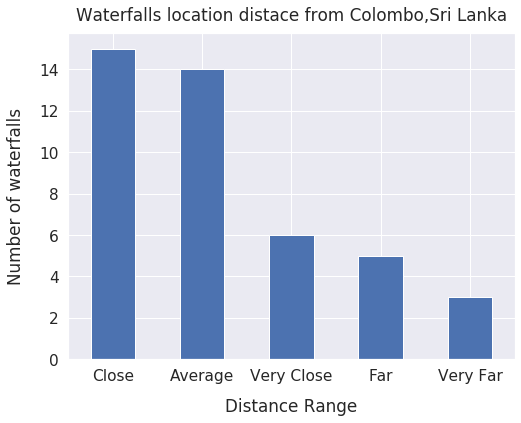

In [126]:
sns.set(font_scale=1.4)
df1['Travellable'].value_counts().plot(kind='bar', figsize=(8, 6), rot=0)
plt.xlabel("Distance Range", labelpad=14)
plt.ylabel("Number of waterfalls", labelpad=14)
plt.title("Waterfalls location distace from Colombo,Sri Lanka", y=1.02);
